In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

# Image Processing with Neural Network
## Lecture 04 - One Hidden Layer

- Moons Dataset
- Decision Boundary
- Loss curve
- Sigmoid, Tanh

<img src='../../../prasami_images/prasami_color_tutorials_small.png' width='400' alt="By Pramod Sharma : pramod.sharma@prasami.com" align = "left"/>

## Import Statements

In [5]:
###-----------------
### Import Libraries
###-----------------

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score, classification_report
import tensorflow as tf

## Setup Global Parameters

In [53]:
# Set a fixed random state for reproducibility
RANDOM_STATE = 24 

# Seed the random number generator for NumPy
np.random.seed(RANDOM_STATE)

# Seed the random number generator for TensorFlow
tf.random.set_seed(RANDOM_STATE)

# Define the number of training epochs
EPOCHS = 100

# Set the test data proportion for splitting the dataset
TEST_SIZE = 0.2

ALPHA= 0.001

In [56]:
data_df = pd.read_csv('wine.csv', header=None)
data_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [58]:
data_df.shape

(178, 14)

In [60]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       178 non-null    float64
 1   1       178 non-null    float64
 2   2       178 non-null    float64
 3   3       178 non-null    float64
 4   4       178 non-null    int64  
 5   5       178 non-null    float64
 6   6       178 non-null    float64
 7   7       178 non-null    float64
 8   8       178 non-null    float64
 9   9       178 non-null    float64
 10  10      178 non-null    float64
 11  11      178 non-null    float64
 12  12      178 non-null    int64  
 13  13      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [62]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
0,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
1,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
2,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
3,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
4,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
5,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
6,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
7,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
8,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
9,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


In [64]:
data_df.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
1,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
2,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
3,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
4,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
5,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
6,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
7,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
8,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
9,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


<Axes: >

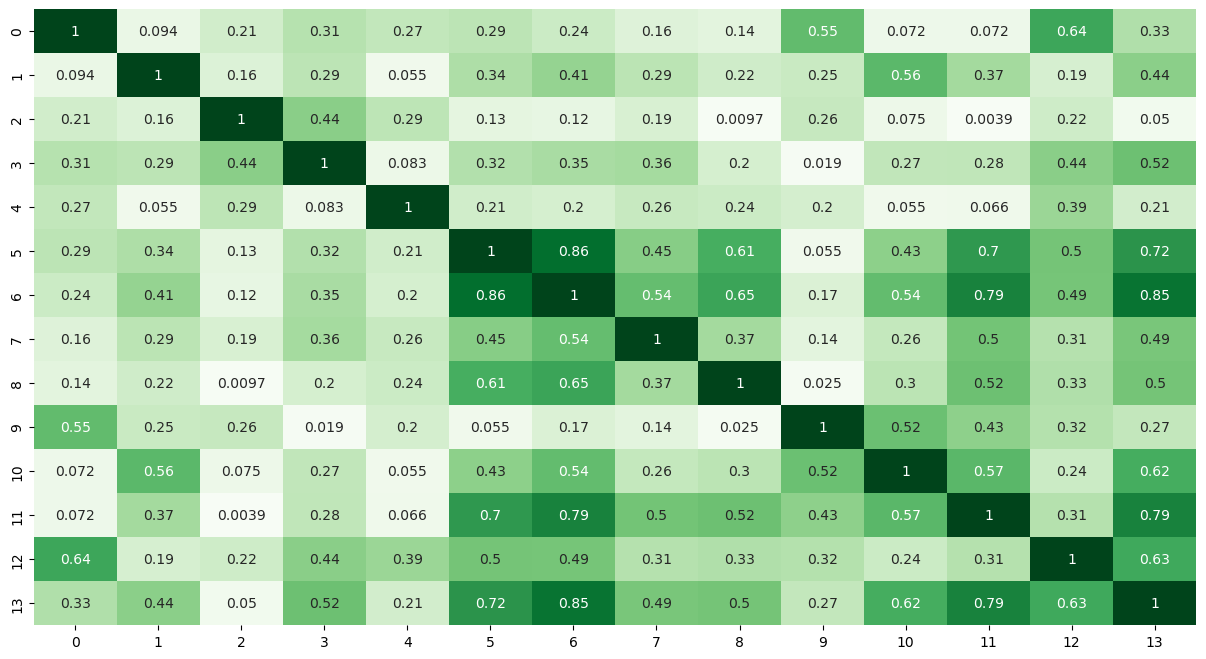

In [66]:
fig, ax = plt.subplots(figsize = (15,8))
sns.heatmap(data_df.corr().abs(), cmap='Greens', annot = True, fmt= '.2g', cbar = False)

In [67]:
for col in data_df.columns:
    print(f'{col}: {data_df[col].unique()}\n')

0: [14.23 13.2  13.16 14.37 13.24 14.2  14.39 14.06 14.83 13.86 14.1  14.12
 13.75 14.75 14.38 13.63 14.3  13.83 14.19 13.64 12.93 13.71 12.85 13.5
 13.05 13.39 13.3  13.87 14.02 13.73 13.58 13.68 13.76 13.51 13.48 13.28
 13.07 14.22 13.56 13.41 13.88 14.21 13.9  13.94 13.82 13.77 13.74 13.29
 13.72 12.37 12.33 12.64 13.67 12.17 13.11 13.34 12.21 12.29 13.49 12.99
 11.96 11.66 13.03 11.84 12.7  12.   12.72 12.08 12.67 12.16 11.65 11.64
 12.69 11.62 12.47 11.81 12.6  12.34 11.82 12.51 12.42 12.25 12.22 11.61
 11.46 12.52 11.76 11.41 11.03 12.77 11.45 11.56 11.87 12.07 12.43 11.79
 12.04 12.86 12.88 12.81 12.53 12.84 13.36 13.52 13.62 12.87 13.32 13.08
 12.79 13.23 12.58 13.17 13.84 12.45 14.34 12.36 13.69 12.96 13.78 13.45
 12.82 13.4  12.2  14.16 13.27 14.13]

1: [1.71 1.78 2.36 1.95 2.59 1.76 1.87 2.15 1.64 1.35 2.16 1.48 1.73 1.81
 1.92 1.57 1.59 3.1  1.63 3.8  1.86 1.6  2.05 1.77 1.72 1.9  1.68 1.5
 1.66 1.83 1.53 1.8  1.65 3.99 3.84 1.89 3.98 4.04 3.59 2.02 1.75 1.67
 1.7  1.97 1.4

In [68]:
## prepare data for training

In [69]:
labels= data_df[data_df.columns[-1]]
features_df= data_df.drop(data_df.columns[-1], axis = 1)
assert features_df.shape[0]== labels.shape[0], 'Number of examples not same'

In [74]:
#split data into train and test

In [76]:
X_train, X_test, y_train, y_test = train_test_split(features_df, labels, stratify= labels,
                                                   random_state=RANDOM_STATE, test_size= TEST_SIZE)

assert X_train.shape[0] == y_train.shape[0], 'number of trainig exampels not same'

assert X_test.shape[0] == y_test.shape[0], 'number of testing exampels not same'

In [78]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [80]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [82]:
np.unique(y_train)

array([0, 1, 2], dtype=int64)

In [84]:
#nodes : 13, 8, 3

model = tf.keras.Sequential([tf.keras.Input(shape = (X_train.shape[1],)),
                            tf.keras.layers.Dense(8, activation='relu'),
                            tf.keras.layers.Dense(3)])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 8)                   │             112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │              27 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 139 (556.00 B)

 Trainable params: 139 (556.00 B)

 Non-trainable params: 0 (0.00 B)

In [86]:
#step 1: loss function

In [91]:
loss_fn= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
#STEP2 :optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=ALPHA)
#step3 :
model.compile(loss=loss_fn,optimizer= optimizer, metrics =['accuracy'])
#step 4:
history = model.fit(X_train, y_train,
                    epochs=EPOCHS,
                    validation_data=(X_test,y_test))


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.6261 - loss: 0.9193 - val_accuracy: 0.5556 - val_loss: 0.9827
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6261 - loss: 0.8868 - val_accuracy: 0.5278 - val_loss: 0.9481
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6297 - loss: 0.8512 - val_accuracy: 0.5556 - val_loss: 0.9147
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6261 - loss: 0.8287 - val_accuracy: 0.6111 - val_loss: 0.8828
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6561 - loss: 0.8019 - val_accuracy: 0.6667 - val_loss: 0.8523
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6997 - loss: 0.7761 - val_accuracy: 0.6944 - val_loss: 0.8233
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6944 - loss: 0.7517 - val_accuracy: 0.7222 - val_loss: 0.7957
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7057 - loss: 0.7289 - val_accuracy: 0.7778 - val_loss: 0.7695

In [93]:
loss_df = pd.DataFrame(history.history)
loss_df.head()

,accuracy,loss,val_accuracy,val_loss
0,0.612676,0.928352,0.555556,0.982737
1,0.612676,0.898440,0.527778,0.948088
2,0.612676,0.870611,0.555556,0.914666
3,0.612676,0.844267,0.611111,0.882789
4,0.633803,0.819203,0.666667,0.852287


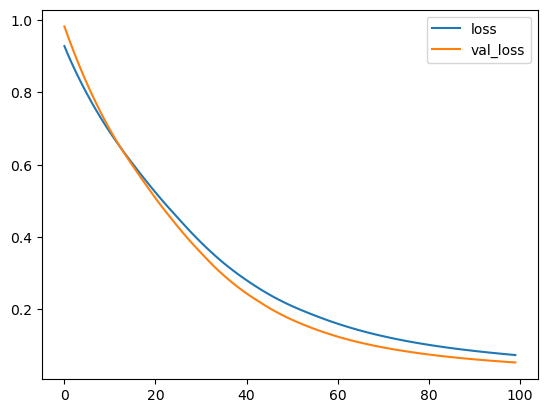

In [97]:
ax=loss_df.plot(y=['loss', 'val_loss'])

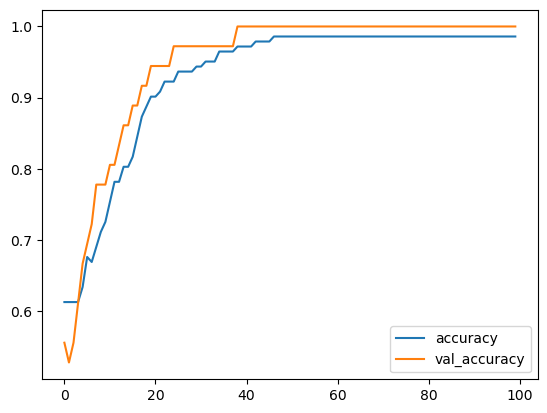

In [99]:
ax= loss_df.plot(y=['accuracy','val_accuracy'])

In [101]:
y_train_pred = model.predict(X_train).argmax(axis=1)
y_test_pred= model.predict(X_test).argmax(axis=1)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [105]:
print(f'Accuracy: {accuracy_score(y_train,y_train_pred): .4f}')

Accuracy:  0.9859


In [107]:
print(f'Accuracy: {accuracy_score(y_test,y_test_pred): .4f}')

Accuracy:  1.0000


In [109]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [113]:
cm = confusion_matrix(y_test, y_test_pred)
cm

array([[12,  0,  0],
       [ 0, 14,  0],
       [ 0,  0, 10]], dtype=int64)

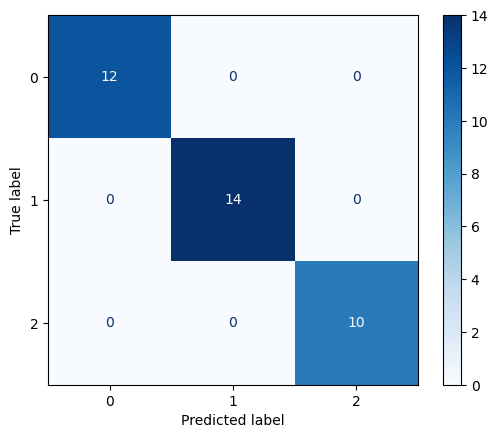

In [115]:
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap = 'Blues')

In [117]:
f1_score(y_test, y_test_pred, average='weighted')

1.0

In [119]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        47
           1       1.00      0.96      0.98        57
           2       0.97      1.00      0.99        38

    accuracy                           0.99       142
   macro avg       0.98      0.99      0.99       142
weighted avg       0.99      0.99      0.99       142

